## The representational similarity of primary and secondary emotions:
### investigating the brain patterns of different emotional stimuli on local and global scale

Scarlett Slagter, Jurriaan te Koppele, University of Amsterdam, Pattern Analysis 2017



<div class='alert alert-info'>
Nice work!

<br><br>
Argumentation analysis (10%): 8.5<br><br>
Embedding in literature (5%): 8<br><br>
Implementation analysis (55%): 10<br><br>
Clarity (30%): 9<br><br>
Total: 9.5
</div>

## Introduction

### Prior research
The role of the amygdala is already investigated exhaustively.  It plays a role in  implicit emotional learning and memory, emotional modulation of memory, emotional influences on attention and perception, emotion and social behavior, and emotion inhibition and regulation (Phelps et al., 2005).  However its role is only investigated regarding primary emotions such as anger, happy and fear.  It has been shown that the amygdala activates significantly for  happy, fearful and sad faces, but not for angry faces (Phillips et al., 2004, Adolphs et al., 2002 ). However, the insular seems to be sensitivity for angry faces (Adolphs et al., 2002). Primary emotions involves core affective processing, they are easy to recognize and its processing is probably more homogeneous within the population. Secondary emotions, however, are harder to recognize and interpret. Secondary emotions dependent more on mentalizing and interpretative processing, which suggests more individual differences in the representations of these emotions in the brain. Furthermore, one might hypothesize that more brain regions are involved in its processing, such as the ACC and AI of the salience network and the mPFC, vlPFC, lOFC, PCC of the default-network. The default-network has shown the be important for understanding the emotions of other people and empathizing with their feelings.

It has already been shown that the medial prefrontal cortex plays a general role in emotional processing (Phan et al.,2002). Furthermore an EEG study showed significant differences in ERP maps  in different time segments within the first 500 ms after stimulus onset. Each emotional condition (Happy, sad, anger, fear and disgust) showed specific activation patterns in different brain regions, changing over time. In the majority of significant time segments, activation was highest in the right frontal areas( Esslen et al., 2004). However, little is known about the process of secondary emotions within the brain  and its difference with primary emotional processing. 
Therefore, the representation of primary and secondary emotion within the brain need to be investigated further. Based on earlier research one can draw some hypotheses about the differences between the representations of primary and secondary emotions and on which scale these representations differ throughout the brain. These hypotheses are captured by our conceptual model, explained below. 


### About the conceptual model
Our conceptual model captures some hypotheses which can be seen as the features of this model. The first hypothesis: primary emotions of a different valence (i.e joy and anger) will have a more distinguishable representation in the brain, than secondary emotions ( i.e pride and contempt). In other words, the representational dissimilarity between positive and negative emotions is greater for primary emotions than for secondary emotions.
The second hypothesis: primary emotion and a secondary emotion of the same valence will show  more similarity in their representation compared to two primary emotions of a different valence (i.e. positive and negative). See the figure below for a vizualisation of the model in space (using correlation distance as metric). <img src='conc_model(1).png'>  

Furthermore, we hypothesize that our conceptual idea on how the representations of these emotions relate to each other in the brain (by exploring their dissimilarity), is represented on a global scale and not on a local scale.

### Research questions
Our main question is whether primary and secondary emotions of negative and positive valence are represented in the brain as tested by our introduced conceptual model.  

Secondly, we will investigate whether the proposed conceptual RDM matches the emotional representations in the brain on a local or on a global scale. This will give information about whether the emotional stimuli differ already on a local representation or on a global representation.


### Why RSA?
RSA characterizes the representation in each brain region by a representational dissimilarity matrix (RDM). A RDM is a square symmetric matrix, each entry referring to the dissimilarity between the activity patterns associated with two stimuli (i.e perceived emotion).


For each pair of experimental stimuli, the response patterns elicited in a brain region are compared to determine the stimuli’s representational dissimilarity. The dissimilarity between two patterns can be measured as 1 minus the correlation (0 for perfect correlation, 1 for no correlation, 2 for perfect anticorrelation). These dissimilarities for all pairs of stimuli are assembled in the representational dissimilarity matrix (RDM).  One can make a conceptual RDM, and correlate this conceptual RDM with the brain-RDM to test whether your conceptual model about the similarity of particular stimuli  representations ( i.e primary and secondary emotions) in the brain fits the actual representational similarity in the brain.  

We choose to analyze our research questions with a RSA, because this is the only analysis that can give us insight on *how* processing of primary and secondary emotions differ and whether the dissimilarity between processing positive and negative stimuli is larger for primary than for secondary emotions. To test whether the dissimilarity between processing positive and negative emotions is greater for primary emotions in contrast to secondary emotions, we will create a conceptual representational dissimilarity matrix (RDM) based on our hypotheses. We fit this conceptual RDM of distinguishable levels of emotional processing on our data, which will be converted to a brain-RDM. 
The figure below shows how our conceptual model about the representation of emotions in the brain looks like when we translate it to a conceptual RDM.
<img src='conc_RDM.png'>


<div class='alert alert-info'>
**Feedback**: I think you introduced your research question well (how do primary and secondary emotions relate to each other in terms of brain representation), but you did not explain or elaborate on why you wanted to investigate local vs. global representations... Your introduction/embedding in the literature would have been more coherent if you would have spend a couple of sentences on this. Oh, and I think your images/figures are great! 
</div>

## The current study: experimental stimuli and procedure 

To investigate our research questions the data of 20 subjects who viewed emotional clips during a fMRI-session will be analyzed. In this fMRI-task subjects viewed 4 different emotions expressed by human actors. So, in this task the perception of emotion was processed. Whether they experienced the emotion is more unlikely than likely.
The emotional stimuli consisted of two primary emotions, namely anger and joy, and two secondary emotions, namely pride and contempt. Each emotional condition consisted of 6 trials. However, per subject one emotional condition consisted of 9 trials. The emotional condition with 9 trials differed over subjects.
Participants also viewed neutral emotional clips, however this neutral condition is not of intrest in our study. 



# Method & analysis
In this section we will explain our method step-wise. It includes text-blocks which introduce the analysis steps, including (motivational) explanations and code-blocks that compute the specific analysis step. The clarify the method the code for the analysis is devided in parts. However, the codes should not or can not be ran because they are actually  part of a class. To write a 'simple' code for the whole analysis ,most codes will be defined as functions in the class which includes a loop through subjects (so all steps will be done for each subject). The whole analysis code can be found at the end of this section.

Below we will first import some packages and functions that will be used throughout the analysis.

In [152]:
#Loading in all functions we will need for this analysis
import numpy as np
import numpy.matlib
from glob import glob
from sklearn.metrics.pairwise import pairwise_distances
import scipy.stats 
import nibabel as nib
import matplotlib.pyplot as plt
from skbold.utils import load_roi_mask
from skbold.utils import print_mask_options
import os.path as op
%matplotlib inline

### Preprocessing fMRI data
The data was preprocessed with a smoothing kernel of 5 mm. 


### First-level analysis: single-trial modeling 
First, for each subject a first-level analysis was ran by fitting a general linear model (GLM) with a single-trial design on the fmri-data. In this GLM the individual time series were modeled using a double gamma hemodynamic response function using FSL’s FEAT. 
Single-trial-against-baseline contrast were set which resulted in a beta-value for each voxel per trial. The beta-values were then converted to t-values. So at the end, whole-brain t-value patterns per trial, for each subject were collected. 

### 1.Loading in the correct  t-stat files of each subject and coupling the conditional labels


The tstat-files for each subject will be used to create the brain RDM. 
The code below will find the paths to the tstat-files (one per trial) of each subjects and will organize these paths. In total 24 tstat-file paths for 19 subjects will be created (6 trials for each emotional condition). 

In [176]:
subject_paths = glob('/home/Public/FacesWithinSubjectFirstLevel/pi*/faces.feat') #We did it like this so we can loop through all subject-paths later.

tstat_paths_pp1 = glob(subject_paths[0]+'/stats/tstat*')

#organizing the t-stat paths
tstat_paths_pp1 = sorted(tstat_paths_pp1, key=lambda x: int(op.basename(x).split('.')[0].split('tstat')[-1]))

print subject_paths #You can see the first part of each subject's directory
print tstat_paths_pp1 #For the first participant (pi0117) you see all ordered tstat-paths (33)


['/home/Public/FacesWithinSubjectFirstLevel/pi0117/faces.feat', '/home/Public/FacesWithinSubjectFirstLevel/pi0118/faces.feat', '/home/Public/FacesWithinSubjectFirstLevel/pi0110/faces.feat', '/home/Public/FacesWithinSubjectFirstLevel/pi0103/faces.feat', '/home/Public/FacesWithinSubjectFirstLevel/pi0112/faces.feat', '/home/Public/FacesWithinSubjectFirstLevel/pi0106/faces.feat', '/home/Public/FacesWithinSubjectFirstLevel/pi0114/faces.feat', '/home/Public/FacesWithinSubjectFirstLevel/pi0101/faces.feat', '/home/Public/FacesWithinSubjectFirstLevel/pi0116/faces.feat', '/home/Public/FacesWithinSubjectFirstLevel/pi0100/faces.feat', '/home/Public/FacesWithinSubjectFirstLevel/pi0108/faces.feat', '/home/Public/FacesWithinSubjectFirstLevel/pi0113/faces.feat', '/home/Public/FacesWithinSubjectFirstLevel/pi0105/faces.feat', '/home/Public/FacesWithinSubjectFirstLevel/pi0104/faces.feat', '/home/Public/FacesWithinSubjectFirstLevel/pi0109/faces.feat', '/home/Public/FacesWithinSubjectFirstLevel/pi0120/face

We now have the t-stat paths for all the conditions. However, because we will exclude the neutral trials we need to exclude the t-stat files belonging to this condition. We will do this by indexing only the t-stat paths belonging to the conditions of interest. The conditions of all the single-trial-against-baseline contrasts are extracted and stored in a text-file called condition_labels.txt. This file is specific for each subject and important for loading in the correct tstat-files. Furthermore it is used for creating the conceptual RDM for each subject. However, this will be done in a later step. 
We chose to use an equal number of trials (six) in each emotional condition, because otherwise calculating the noise ceiling would be impossible, since every participant's RDM would have a different shape. Therefore, we built a function that returns the indices of the correct labels (taking 6 trials of each emotional condition and excluding neutral): 'index_correct_labels'. This index can be used to get the correct labels and the correct tstat-paths.

In [177]:
# CODE for excluding the indices of the neutral labels and labels for the first 6 trials of each condition.
# Calling this function returns the index of the correct labels that can be used both to index the labels-array or another array (tstat-paths.)
def index_correct_labels(labels):

    idx = np.zeros(len(labels), dtype = bool)
    anger_count = 0
    contempt_count = 0
    joy_count = 0
    pride_count = 0
    for a, label in enumerate(labels):
        if label == 'Anger' and anger_count < 6:
            anger_count += 1
            idx[a] = True
        elif label == 'Contempt' and contempt_count < 6:
            contempt_count += 1
            idx[a] = True
        elif label == 'Joy' and joy_count < 6:
            joy_count += 1
            idx[a] = True
        elif label == 'Pride' and pride_count < 6:
            pride_count += 1
            idx[a] = True
        else: 
            idx[a] = False

    idx = np.array(idx)
    return idx

<div class='alert alert-info'>
**Feedback**: Well programmed!
</div>

In the code below, we load in the condition_labels file for pi0117 and convert the list with strings to a numpy string array. We will call our 'index_correct_labels' function to select the right t-stat paths for this subject.  

In [178]:
subjectlabels = np.loadtxt(subject_paths[0]+'/condition_labels.txt', dtype=str)
subjectlabels = np.array(subjectlabels)
print("Before indexing the selecting the correct tstats, there are: %s t-stats" % len(tstat_paths_pp1))

#you can only run this once, because the tstats_paths will be updated (size decreases).
#The idx stays the original size.
idx = index_correct_labels(subjectlabels)
tstat_paths_pp1 = np.array(tstat_paths_pp1)[idx] 
print("After indexing the selecting the correct tstats, there are: %s t-stats" % len(tstat_paths_pp1))

Before indexing the selecting the correct tstats, there are: 33 t-stats
After indexing the selecting the correct tstats, there are: 24 t-stats


Now we got the correct tstat-paths, we are now ready to load in our tstats. We do this with our Mvp-class. Since we have done this 20 times by now and this Mvp-class is super simple, we are not gonna explain it. We use a random tstat to check the shape below.

In [179]:
#We take the 16th tstat of this subject, to check the shape of our tstats, which we need in our Mvp-class.
nifti_file = nib.load(tstat_paths_pp1[16])
loaded_nifti = nifti_file.get_data()
voxel_dims = loaded_nifti.shape
print voxel_dims

(80, 80, 37)


In [180]:
class Mvp():
    """ Custom class to load, organize, and process multivoxel MRI patterns. """
    
    def __init__(self, paths):
        
        self.paths = paths
        
    def load(self, voxel_dims=(80, 80, 37)):
        
        X = np.zeros((len(self.paths), np.prod(voxel_dims)))

        for i, path in enumerate(self.paths):
    
            X[i, :] = nib.load(path).get_data().ravel()
        
        self.X = X


In [181]:
subject_mvp = Mvp(tstat_paths_pp1) 
subject_mvp.load(voxel_dims = voxel_dims) #loading in the paths.
print ("The shape of the data of this participant is:" ) 

print subject_mvp.X.shape

The shape of the data of this participant is:
(24, 236800)


<div class='alert alert-info'>
**Feedback**: Looks good. It's always good to check the shape of your data, making sure it is the same as you expected it to be, so well done. 
</div>

### 2. Applying a global and local mask
As voxel-selection we will use an ROI-approach. Therefore a mask will be applied on the tstat-files.  Because we are interested in the representational dissimilarity on a global and local scale, we will apply two mask. One mask containing only the voxels in the amygdala (192 voxels) and one mask including the regions of the salience and default-mode network (8178 voxels). The data including only voxels within the amygdala will be used for the local brain RDM. The global brain RDM will be based on the t-values of the voxels within the salience-network.  

In [182]:
# CODE-block 
#Loading masks (implicitly transforming them from standard MNI to subject-specific EPI space)
default_mask = np.array(load_roi_mask(roi_name = 'Network_7', atlas_name='Yeo2011', reg_dir=subject_paths[0]+'/reg')[0])
salience_mask = np.array(load_roi_mask(roi_name = 'Network_4', atlas_name='Yeo2011', reg_dir=subject_paths[0]+'/reg')[0])
global_mask = salience_mask + default_mask
    

local_mask = load_roi_mask(roi_name ='Amygdala', atlas_name='HarvardOxford-Subcortical', lateralized=False, reg_dir=subject_paths[0]+'/reg', threshold=20)[0]

#Applying global and local mask:
global_pattern = subject_mvp.X[:, global_mask.ravel()]
local_pattern = subject_mvp.X[:, local_mask.ravel()]

print ("The shape of the data of this participant after applying the global mask is:" ) 
print global_pattern.shape

print ("The shape of the data of this participant after applying the local mask is:" ) 
print local_pattern.shape


The shape of the data of this participant after applying the global mask is:
(24, 8178)
The shape of the data of this participant after applying the local mask is:
(24, 192)


### 3. Making the global and local brain-RDM 
The brain-RDMs per subject will be constructed by calculating the distance between samples (i.e trials), in terms of their patterns in  K-dimensional space. K refers to the amount of voxels, which is192  in the local RDM and 8178 in the global RDM. We will use the metric correlation  for computing the correlation distance, which will reflect the (dis-)similarities between pairs of activity patterns.  



from the package scikit-learn we will use the function `pairwise_distances`. This function takes a a samples-by-feature matrix (i.e a trial-by voxel matrix) and transforms it into a samples-by-samples distance matrix, resulting in a brain-RDM.  

In [183]:
# Making the global and local brain-RDM using pairwise_distances
global_brain_rdm = pairwise_distances(global_pattern, metric = 'correlation')
local_brain_rdm = pairwise_distances(local_pattern, metric = 'correlation')

print global_brain_rdm.shape #This trial-by-trial matrix should have a shape of 24 by 24.
print local_brain_rdm.shape #This trial-by-trial matrix should have a shape of 24 by 24.

(24, 24)
(24, 24)


Now, let's plot these brain-RDM to visualize what these global and local RDM's look like:

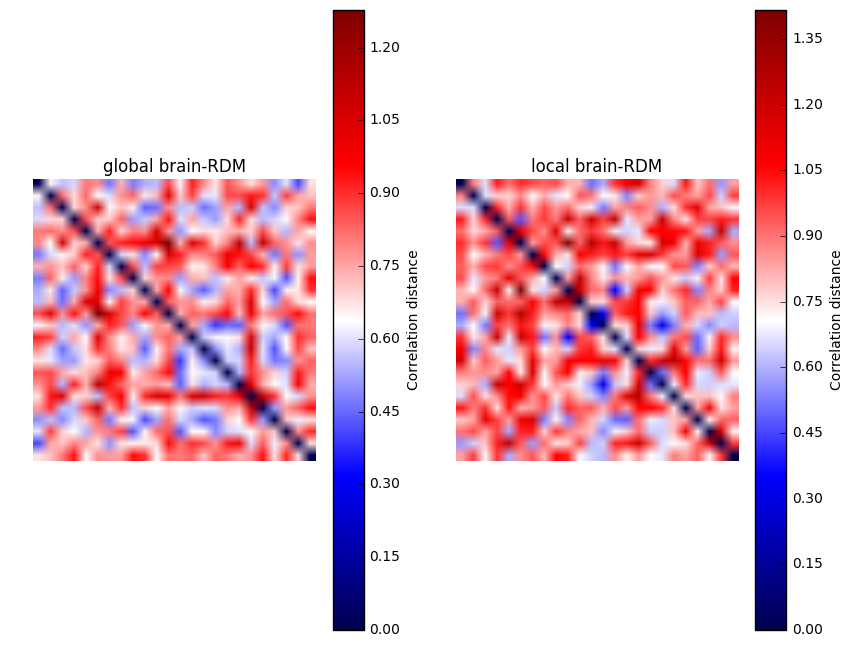

In [184]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title("global brain-RDM")
plt.imshow(global_brain_rdm, cmap = 'seismic')
plt.colorbar(label = "Correlation distance")
plt.axis('off')

plt.subplot(1,2,2)
plt.title("local brain-RDM")
plt.imshow(local_brain_rdm, cmap = 'seismic')
plt.colorbar(label = "Correlation distance")
plt.axis('off')
plt.show()

<div class='alert alert-info'>
**Feedback**: Very clear! Again, good that you check each step in your analysis!
</div>

### 4. Making the conceptual model (based on the condition labels of each subject)
As notified  earlier, the condition label text file is specific for each subject and important for creating the conceptual RDM for each subject; you need to know to which condition each sample (trial) in our brain RDM belongs.
Below you see the function 'make_conceptual_rdm' we wrote to create a RDM for each subject, taking the correct labels as an argument and returns the conceptual RDM. 

Note: it is important to first run the 'index_correct_labels' function (returns index) and re-update the labels with this index before you make the conceptual model, since you want the conceptual and brain RDM to be the same (obviously).


In [185]:
# Defining a function that returns a conceptual RDM based on a labels file for each participant.
def make_conceptual_rdm(labels):
    
    #Create the RDM that distinguishes between primary and secondary emotions.
    dist_rdm = np.zeros((len(labels),len(labels)))
    for i in range(len(labels)):
        for j in range(len(labels)):
            anger_and_contempt = (labels[i] == "Anger" and labels[j] == "Contempt") or (labels[i] == "Contempt" and labels[j] == "Anger")
            joy_and_pride = (labels[i] == "Joy" and labels[j] == "Pride") or (labels[i] == "Pride" and labels[j] == "Joy")
            pride_and_contempt = (labels[i] == "Pride" and labels[j] == "Contempt") or (labels[i] == "Contempt" and labels[j] == "Pride")
            anger_and_pride = (labels[i] == "Anger" and labels[j] == "Pride") or (labels[i] == "Pride" and labels[j] == "Anger")
            joy_and_contempt = (labels[i] == "Joy" and labels[j] == "Contempt") or(labels[i] == "Contempt" and labels[j] == "Joy")
            anger_and_joy = (labels[i] == "Anger" and labels[j] == "Joy") or (labels[i] == "Joy" and labels[j] == "Anger")
            
            if labels[i] == labels[j]:
                dist_rdm[i,j] = 0
                
            elif anger_and_contempt or joy_and_pride:
                dist_rdm[i,j] = 0.25
            
            elif pride_and_contempt:
                dist_rdm[i,j] = 0.5
                
            elif anger_and_pride or joy_and_contempt:
                dist_rdm[i,j] = 0.75
                
            elif anger_and_joy:
                dist_rdm[i,j] = 1
                
    return dist_rdm

<div class='alert alert-info'>
**Feedback**: This is not easy to implement ... Well done :)
</div>

<function matplotlib.pyplot.show>

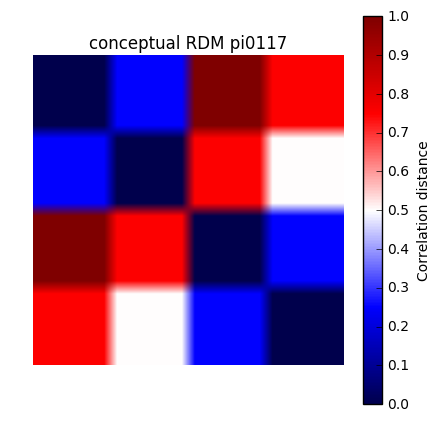

In [186]:
#Now we create the conceptual RDM for pi0117:
subjectlabels = subjectlabels[idx]
conc_rdm = make_conceptual_rdm(subjectlabels)

plt.figure(figsize=(5,5))
plt.title("conceptual RDM pi0117")
plt.imshow(conc_rdm, cmap = 'seismic')
plt.colorbar(label = "Correlation distance")
plt.axis('off')
plt.show

<div class='alert alert-info'>
**Feedback**: Looks good.
</div>

### Testing the brain-RDMs against the conceptual RDMs 
To test whether our conceptual model RDM,  significantly explains our brain-RDMs, we need to correlate them.  Firstly, we test the explanatory power of the conceptual model on the local brain RDMs.  Of each RDM, we will only use sample*(sample-1)/2 dissimilarity values; including all the values of the RDM we would include twice as many pairwise dissimilarities than there really are, leading to inflated correlation between the conceptual and brain-RDM. We will use the Spearman rank correlation because we do not assume that the relationship between the conceptual and brain-RDM is linear.  

In [187]:
#extract upper triangles:
conc_rdm_triu = conc_rdm[np.triu_indices(conc_rdm.shape[0], k = 1)]
global_brain_rdm_triu = global_brain_rdm[np.triu_indices(global_brain_rdm.shape[0], k = 1)]
local_brain_rdm_triu = local_brain_rdm[np.triu_indices(local_brain_rdm.shape[0], k = 1)]

#Spearman correlation between conceptual and GLOBAL brain-RDM
corr_conc_vs_global = scipy.stats.spearmanr(conc_rdm_triu, global_brain_rdm_triu)[0]

#Spearman correlation between conceptual and GLOBAL brain-RDM
corr_conc_vs_local = scipy.stats.spearmanr(conc_rdm_triu, local_brain_rdm_triu)[0]

print ('For participant pi0117 the correlation between our conceptual model and the local brain-RDM is %f' %corr_conc_vs_local)
print ('For participant pi0117 the correlation between our conceptual model and the global brain-RDM is %f' %corr_conc_vs_global)


For participant pi0117 the correlation between our conceptual model and the local brain-RDM is 0.025936
For participant pi0117 the correlation between our conceptual model and the global brain-RDM is 0.020335


So now we got these correlations. What can we do with this? ** Nothing! **


We need to run this analyis for every participant. Below we implent this analysis in a for-loop looping through subjects.
First, let's initialize a few objects we need for this analysis.

<div class='alert alert-info'>
**Feedback**: Haha, well, that's not totally true! Usually, for psychology experiments, you want to make inferences about the population, so you'd need to perform the analysis on a *sample* of subjects. But theoretically, you could assess significance on just a single subject by doing a permutation analysis. But that's kind of besides the point here I guess.
</div>

## Analysis

In [188]:
subject_paths = glob('/home/Public/FacesWithinSubjectFirstLevel/pi*/faces.feat')
correlations_global = []
correlations_local = []
global_brain_rdms = np.zeros((24*(24-1)/2, 20)) 
local_brain_rdms = np.zeros((24*(24-1)/2, 20)) 

In [189]:
for i, sub in enumerate(subject_paths): #looping through subjects.
    #CODE for loading in and storing condition-labels into a numpy-array.
    labels = np.loadtxt(sub+'/condition_labels.txt', dtype=str)
    labels = np.array(labels)
    
    #Using a pre-defined function to get the labels of labels of 6 trials of each emotional condition.
    idx = index_correct_labels(labels)

    # CODE for defining the tstat_paths, excluding neutral trials based on condition-labels.
    tstat_paths = glob(sub+'/stats/tstat*.nii.gz') 
    tstat_paths = sorted(tstat_paths, key = lambda x:int(op.basename(x).split('.')[0].split('tstat')[-1]))
    tstat_paths = np.array(tstat_paths)[idx] 

    #create Mvp-object, for loading tstat-files.
    subject_mvp = Mvp(tstat_paths) 
    subject_mvp.load(voxel_dims = (80,80,37))

    #Loading masks (implicitly transforming them from standard MNI to subject-specific EPI space)
    default_mask = np.array(load_roi_mask(roi_name = 'Network_7', atlas_name='Yeo2011', reg_dir=sub+'/reg')[0])
    salience_mask = np.array(load_roi_mask(roi_name = 'Network_4', atlas_name='Yeo2011', reg_dir=sub+'/reg')[0])
    global_mask = salience_mask + default_mask
    local_mask = load_roi_mask(roi_name ='Amygdala', atlas_name='HarvardOxford-Subcortical', lateralized=False, reg_dir=sub+'/reg', threshold=20)[0]

    #Applying global and local mask:
    global_pattern = subject_mvp.X[:, global_mask.ravel()]
    local_pattern = subject_mvp.X[:, local_mask.ravel()]

    # Making the global and local brain-RDM using pairwise_distances
    global_brain_rdm = pairwise_distances(global_pattern, metric = 'correlation')
    local_brain_rdm = pairwise_distances(local_pattern, metric = 'correlation')

    #Create conceptual RDM with previously defined function, using subject-specific condition-labels, excluding neutral.
    labels = labels[idx] 
    conc_rdm = make_conceptual_rdm(labels)
    
    #extract upper triangles:
    conc_rdm_triu = conc_rdm[np.triu_indices(conc_rdm.shape[0], k = 1)]
    global_brain_rdm_triu = global_brain_rdm[np.triu_indices(global_brain_rdm.shape[0], k = 1)]
    local_brain_rdm_triu = local_brain_rdm[np.triu_indices(local_brain_rdm.shape[0], k = 1)]
    
    global_brain_rdms[:, i] = global_brain_rdm_triu # We store the global RDM of each subject in an object, needed for the noise ceiling
    local_brain_rdms[:, i] = local_brain_rdm_triu  # We store the local RDM of each subject in an object, needed for the noise ceiling

    #Spearman correlation between conceptual and GLOBAL brain-RDM
    corr_conc_vs_global = scipy.stats.spearmanr(conc_rdm_triu, global_brain_rdm_triu)[0]
    correlations_global.append(corr_conc_vs_global) # We append this correlation to a vector of correlations, needed for our analysis.

    #Spearman correlation between conceptual and GLOBAL brain-RDM
    corr_conc_vs_local = scipy.stats.spearmanr(conc_rdm_triu, local_brain_rdm_triu)[0]
    correlations_local.append(corr_conc_vs_local) # We append this correlation to a vector of correlations, needed for our analysis.
print 'done'

done


<div class='alert alert-info'>
**Feedback**: This is an example of great code. Just a loop with some functionality abstracted away in functions (like your make_conceptual_rdm function) - well done.
</div>

Because of the violation of independence between the pairwise dissimilarities in RDMs, the Wilcoxon signed-rank test (a one-sample non-parametric t-test), will be performed to test whether the average correlation value (based on the correlation of each subject) is significantly above chance. 


## Model performance and statistical evaluation

In [190]:
# calculate the across-subject t-test of the correlation values, using the wilcoxon function
# For global

global_conc_wilc = scipy.stats.wilcoxon(correlations_global)

# And for local
local_conc_wilc = scipy.stats.wilcoxon(correlations_local)
print ('the average correlation (across subjects) between the conceptual and the global RDM is %f' %np.mean(correlations_global))
print ('the average correlation (across subjects) between the conceptual and the local RDM is %f' %np.mean(correlations_local))
print ('the belonging p-value for the global-conceptual correlations is %f' %global_conc_wilc[1])
print ('the belonging p-value for the local-conceptual correlations is %f' %local_conc_wilc[1])

the average correlation (across subjects) between the conceptual and the global RDM is 0.003331
the average correlation (across subjects) between the conceptual and the local RDM is 0.001676
the belonging p-value for the global-conceptual correlations is 0.851925
the belonging p-value for the local-conceptual correlations is 0.881293


<div class='alert alert-info'>
**Feedback**: Ah, that's a pity! The correlation from the single subject before looked promising... Ah well.
</div>

### Correcting for multiple testing
Since we ran two Wilcoxon test, we should correct for multiple testing. Most conservatively we should divide our alpha-level by 2. This means we have to compare our p-value with an alpha of .025. However, one could doubt the independency of these two test (the same hypothesis is tested in different regions). We chose to be rather conservative. 

<div class='alert alert-info'>
**Feedback**: That's not really the case. The violation of independence renders subject-specific p-values for their corresponding correlations invalid, but not a test across the correlations of multiple subjects. The Wilcoxon signed rank test is argued to be more appropriate because it does not assume linearity.
</div>

### Estimating the  "upper bound" of  a conceptual model performance (noise ceiling) 
We will estimate the highest correlation of any model (upper bound performance) with the brain-RDM that we can expect given the noise in the data, also known as calculating the noise ceiling. This will help us with interpreting the fit ( expressed in the correlation value) of our conceptual model. 

In [191]:
#CODE block
#noise ceiling for global brain data 

global_av_brain_rdms = global_brain_rdms.mean(axis=1) 
cor_specific_av_global_brain_RDM=[]


for i in range(len(global_brain_rdms[1])):
    global_spear_correlation = scipy.stats.spearmanr(global_brain_rdms[:, i], global_av_brain_rdms)[0]
    cor_specific_av_global_brain_RDM.append(global_spear_correlation)


noise_ceiling_global= np.mean(cor_specific_av_global_brain_RDM) # Finds the noise ceiling!

# noise ceiling for local brain data 
local_av_brain_rdms = local_brain_rdms.mean(axis=1) 
cor_specific_av_local_brain_RDM=[]

for i in range(len(local_brain_rdms[1])):
    local_spear_correlation = scipy.stats.spearmanr(local_brain_rdms[:, i], local_av_brain_rdms)[0]
    cor_specific_av_local_brain_RDM.append(local_spear_correlation)


noise_ceiling_local = np.mean(cor_specific_av_local_brain_RDM)


print("The upper bound performance of a model for the global brain-RDM is : %s" % noise_ceiling_global)
print("The upper bound performance of a model for the local brain-RDM is : %s" % noise_ceiling_local)


The upper bound performance of a model for the global brain-RDM is : 0.248675104522
The upper bound performance of a model for the local brain-RDM is : 0.236589546382


The highest possible model-performance for the global brain-RDM is 0.25 and the highest possible model-performance for the local brain-RDM is 0.24. This is not that much of a difference. However we will still correct for the difference noise-ceiling for both models, to be able to compare the results of both models.


In fact, While the  upper bound performance indicates the data for both the local and global brain-RDM's is kinda noisy, this does not explain the very low correlations of our conceptual model with both local and global RDM's.

In [192]:
corrected_global_correlations = correlations_global/noise_ceiling_global
corrected_local_correlations = correlations_local/noise_ceiling_local

print("After correcting for the noise-ceiling the global-conceptual correlation is : %f" % np.mean(corrected_global_correlations))
print("After correcting for the noise-ceiling the local-conceptual correlation is : %f" % np.mean(corrected_local_correlations))


After correcting for the noise-ceiling the global-conceptual correlation is : 0.013397
After correcting for the noise-ceiling the local-conceptual correlation is : 0.007084


<div class='alert alert-info'>
**Feedback**: Well, good solution, but still rather insignificant findings. But it's good that you calculated the noise ceiling, because this shows that the data is in general very noisy!
</div>

### Comparing the performance of the conceptual model for the local and global brain- RDM


In [193]:
# CODE- block 
# paired sample t-test to test whether the correlation with the global or the local brain-RDM is higher
paired_ttest = scipy.stats.ttest_rel(corrected_global_correlations, corrected_local_correlations)
print paired_ttest

Ttest_relResult(statistic=0.11110211234663447, pvalue=0.91270062924141382)


The paired sample t-test between global and local correlations with the conceptual RDM indicates that there is no difference in the performance of the conceptual model for both the global and the local brain-RDM. You could say, the conceptual model explains both the local and the global brain-RDM equaly bad. Since this conceptual model performs so awful, we could wonder, whether the brain-areas related to these processes actually do show dissimilar patterns for emotions (in a different model) or whether dissimilar patterns in emotional processing are absent.

We could imagine that the conceptual model does not match the local brain (amygdala) RDM, compared to a simpler model of core emotional processing. We would expect the match between our conceptual model and the global RDM to be better. However, a global RDM, solely relating to areas in the salience network might not be broad enough and capture all the brain areas related to differential emotional proccesing. We might miss important brain areas which map together the dissimilarity patterns.

<div class='alert alert-info'>
**Feedback**: Yeah, I totally agree. This is where data-driven feature selection could be of help.
</div>

### Comparing the match of the complex conceptual model with the mathc of a simple conceptual model
We will match a simple conceptual RDM with both the global and local RDM to check whether there actually are dissimilar patterns within the data, but our conceptual model is to complex and bad. If there are dissimilar patterns, a simpler model might match with the global and local brain-RDM. 
In the code below we first made functions that make the simple conceptual models, based on the specific order of conditions( i.e trials).

In [194]:
def make_simple_rdm(labels):
    
    #Create the RDM that simply distinquishes between positive or negative emotions.
    simple_rdm = np.zeros((len(labels),len(labels)))
    for i in range(len(labels)):
        for j in range(len(labels)):
            anger_and_contempt = (labels[i] == "Anger" and labels[j] == "Contempt") or (labels[i] == "Contempt" and labels[j] == "Anger")
            joy_and_pride = (labels[i] == "Pride" and labels[j] == "Joy") or (labels[i] == "Joy" and labels[j] == "Pride")
            if labels[i] == labels[j]:
                simple_rdm[i,j] = 0
            elif anger_and_contempt or joy_and_pride:
                simple_rdm[i,j] = 0
            else: 
                simple_rdm[i,j] = 1
    return simple_rdm

def make_diag_rdm(labels):
    
    #Create the RDM that has 0 dissimilarity with the same condition and 1 with the rest.
    diag_rdm = np.zeros((len(labels),len(labels)))
    for i in range(len(labels)):
        for j in range(len(labels)):
            if labels[i] == labels[j]:
                diag_rdm[i,j] = 0
            else: 
                diag_rdm[i,j] = 1
    return diag_rdm

In [195]:
#First, let's initialize a few objects we need for our loops.
correlations_simple_global = []
correlations_simple_local = []
correlations_diag_global = []
correlations_diag_local= []
global_brain_rdms = np.zeros((24*(24-1)/2, 20)) 
local_brain_rdms = np.zeros((24*(24-1)/2, 20)) 

This is what this simple RDM looks like


<function matplotlib.pyplot.show>

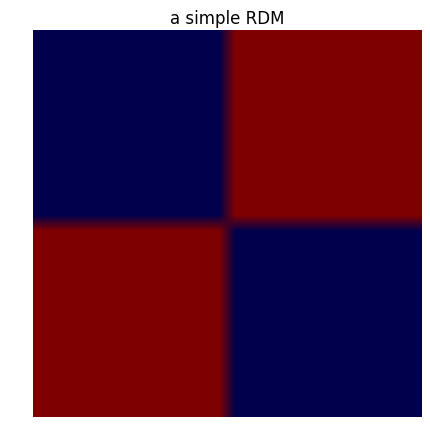

In [173]:
for i, sub in enumerate(subject_paths): #looping through subjects.
    #CODE for loading in and storing condition-labels into a numpy-array.
    labels = np.loadtxt(sub+'/condition_labels.txt', dtype=str)
    labels = np.array(labels)
    
    #Using a pre-defined function to get the labels of labels of 6 trials of each emotional condition.
    idx = index_correct_labels(labels)

    # CODE for defining the tstat_paths, excluding neutral trials based on condition-labels.
    tstat_paths = glob(sub+'/stats/tstat*.nii.gz') 
    tstat_paths = sorted(tstat_paths, key = lambda x:int(op.basename(x).split('.')[0].split('tstat')[-1]))
    tstat_paths = np.array(tstat_paths)[idx] 

    #create Mvp-object, for loading tstat-files.
    subject_mvp = Mvp(tstat_paths) 
    subject_mvp.load(voxel_dims = (80,80,37))

    #Loading masks (implicitly transforming them from standard MNI to subject-specific EPI space)
    default_mask = np.array(load_roi_mask(roi_name = 'Network_7', atlas_name='Yeo2011', reg_dir=sub+'/reg')[0])
    salience_mask = np.array(load_roi_mask(roi_name = 'Network_4', atlas_name='Yeo2011', reg_dir=sub+'/reg')[0])
    global_mask = salience_mask + default_mask
    local_mask = load_roi_mask(roi_name ='Amygdala', atlas_name='HarvardOxford-Subcortical', lateralized=False, reg_dir=sub+'/reg', threshold=20)[0]

    #Applying global and local mask:
    global_pattern = subject_mvp.X[:, global_mask.ravel()]
    local_pattern = subject_mvp.X[:, local_mask.ravel()]

    # Making the global and local brain-RDM using pairwise_distances
    global_brain_rdm = pairwise_distances(global_pattern, metric = 'correlation')
    local_brain_rdm = pairwise_distances(local_pattern, metric = 'correlation')

    #Create simple RDM with previously defined function, using subject-specific condition-labels, excluding neutral.
    labels = labels[idx] 
    simple_rdm = make_simple_rdm(labels)
    
    #extract upper triangles:
    simple_rdm_triu = simple_rdm[np.triu_indices(simple_rdm.shape[0], k = 1)]
    global_brain_rdm_triu = global_brain_rdm[np.triu_indices(global_brain_rdm.shape[0], k = 1)]
    local_brain_rdm_triu = local_brain_rdm[np.triu_indices(local_brain_rdm.shape[0], k = 1)]
    
    global_brain_rdms[:, i] = global_brain_rdm_triu # We store the global RDM of each subject in an object, needed for the noise ceiling
    local_brain_rdms[:, i] = local_brain_rdm_triu  # We store the local RDM of each subject in an object, needed for the noise ceiling

    #Spearman correlation between simple and GLOBAL brain-RDM
    corr_simple_vs_global = scipy.stats.spearmanr(simple_rdm_triu, global_brain_rdm_triu)[0]
    correlations_simple_global.append(corr_simple_vs_global) # We append this correlation to a vector of correlations, needed for our analysis.

    #Spearman correlation between simple and GLOBAL brain-RDM
    corr_simple_vs_local = scipy.stats.spearmanr(simple_rdm_triu, local_brain_rdm_triu)[0]
    correlations_simple_local.append(corr_simple_vs_local) # We append this correlation to a vector of correlations, needed for our analysis.

print ('This is what this simple RDM looks like')
plt.figure(figsize=(5,5))
plt.title("a simple RDM")
plt.imshow(simple_rdm, cmap = 'seismic')
plt.axis('off')
plt.show

In [174]:
# calculate the across-subject t-test of the correlation values, using the wilcoxon function
simple_global_conc_wilc = scipy.stats.wilcoxon(correlations_simple_global)
simple_local_conc_wilc = scipy.stats.wilcoxon(correlations_simple_local)

print ('the average correlation (across subjects) between the simple model and the global RDM is %f' %np.mean(correlations_global))
print ('the average correlation (across subjects) between the simple model and the local RDM is %f' %np.mean(correlations_local))
print ('the belonging p-value for the global-simple correlations is %f' %simple_global_conc_wilc[1])
print ('the belonging p-value for the local-simple correlations is %f' %simple_local_conc_wilc[1])

corrected_global_simple_correlations = correlations_simple_global/noise_ceiling_global
corrected_local_simple_correlations = correlations_simple_local/noise_ceiling_local

print("After correcting for the noise-ceiling the global-simple correlation is : %f" % np.mean(corrected_global_simple_correlations))
print("After correcting for the noise-ceiling the local-simple correlation is : %f" % np.mean(corrected_local_simple_correlations))


the average correlation (across subjects) between the simple model and the global RDM is 0.003331
the average correlation (across subjects) between the simple model and the local RDM is 0.001676
the belonging p-value for the global-simple correlations is 0.708905
the belonging p-value for the local-simple correlations is 0.910825
After correcting for the noise-ceiling the global-simple correlation is : -0.003039
After correcting for the noise-ceiling the local-simple correlation is : 0.007484


So we see that even for the simple model, the average correlation is very low. Before interpreting, let's investigate our diagonal model.

the average correlation (across subjects) between the diagonal model and the global RDM is 0.003331
the average correlation (across subjects) between the diagonal model and the local RDM is 0.001676
the belonging p-value for the global-diagonal correlations is 0.627446
the belonging p-value for the local-diagonal correlations is 0.736875
After correcting for the noise-ceiling the global-diagonal correlation is : -0.019175
After correcting for the noise-ceiling the local-diagonal correlation is : 0.019176
This is what this diagonal RDM looks like


<function matplotlib.pyplot.show>

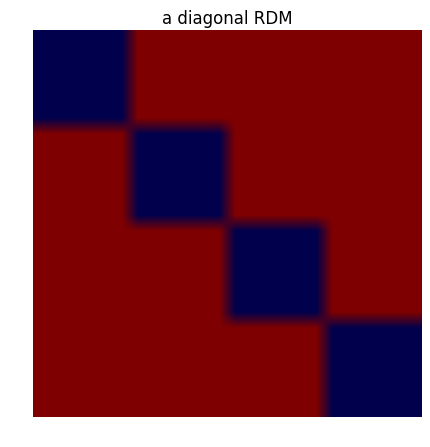

In [175]:
for i, sub in enumerate(subject_paths): #looping through subjects.
    #CODE for loading in and storing condition-labels into a numpy-array.
    labels = np.loadtxt(sub+'/condition_labels.txt', dtype=str)
    labels = np.array(labels)
    
    #Using a pre-defined function to get the labels of labels of 6 trials of each emotional condition.
    idx = index_correct_labels(labels)

    # CODE for defining the tstat_paths, excluding neutral trials based on condition-labels.
    tstat_paths = glob(sub+'/stats/tstat*.nii.gz') 
    tstat_paths = sorted(tstat_paths, key = lambda x:int(op.basename(x).split('.')[0].split('tstat')[-1]))
    tstat_paths = np.array(tstat_paths)[idx] 

    #create Mvp-object, for loading tstat-files.
    subject_mvp = Mvp(tstat_paths) 
    subject_mvp.load(voxel_dims = (80,80,37))

    #Loading masks (implicitly transforming them from standard MNI to subject-specific EPI space)
    default_mask = np.array(load_roi_mask(roi_name = 'Network_7', atlas_name='Yeo2011', reg_dir=sub+'/reg')[0])
    salience_mask = np.array(load_roi_mask(roi_name = 'Network_4', atlas_name='Yeo2011', reg_dir=sub+'/reg')[0])
    global_mask = salience_mask + default_mask
    local_mask = load_roi_mask(roi_name ='Amygdala', atlas_name='HarvardOxford-Subcortical', lateralized=False, reg_dir=sub+'/reg', threshold=20)[0]

    #Applying global and local mask:
    global_pattern = subject_mvp.X[:, global_mask.ravel()]
    local_pattern = subject_mvp.X[:, local_mask.ravel()]

    # Making the global and local brain-RDM using pairwise_distances
    global_brain_rdm = pairwise_distances(global_pattern, metric = 'correlation')
    local_brain_rdm = pairwise_distances(local_pattern, metric = 'correlation')

    #Create diagonal RDM with previously defined function, using subject-specific condition-labels, excluding neutral.
    labels = labels[idx] 
    diag_rdm = make_diag_rdm(labels)
    
    #extract upper triangles:
    diag_rdm_triu = diag_rdm[np.triu_indices(diag_rdm.shape[0], k = 1)]
    global_brain_rdm_triu = global_brain_rdm[np.triu_indices(global_brain_rdm.shape[0], k = 1)]
    local_brain_rdm_triu = local_brain_rdm[np.triu_indices(local_brain_rdm.shape[0], k = 1)]
    
    global_brain_rdms[:, i] = global_brain_rdm_triu # We store the global RDM of each subject in an object, needed for the noise ceiling
    local_brain_rdms[:, i] = local_brain_rdm_triu  # We store the local RDM of each subject in an object, needed for the noise ceiling

    #Spearman correlation between diagonal and GLOBAL brain-RDM
    corr_diag_vs_global = scipy.stats.spearmanr(diag_rdm_triu, global_brain_rdm_triu)[0]
    correlations_diag_global.append(corr_diag_vs_global) # We append this correlation to a vector of correlations, needed for our analysis.

    #Spearman correlation between diagonal and GLOBAL brain-RDM
    corr_diag_vs_local = scipy.stats.spearmanr(diag_rdm_triu, local_brain_rdm_triu)[0]
    correlations_diag_local.append(corr_diag_vs_local) # We append this correlation to a vector of correlations, needed for our analysis.

# calculate the across-subject t-test of the correlation values, using the wilcoxon function
diag_global_conc_wilc = scipy.stats.wilcoxon(correlations_diag_global)
diag_local_conc_wilc = scipy.stats.wilcoxon(correlations_diag_local)

print ('the average correlation (across subjects) between the diagonal model and the global RDM is %f' %np.mean(correlations_global))
print ('the average correlation (across subjects) between the diagonal model and the local RDM is %f' %np.mean(correlations_local))
print ('the belonging p-value for the global-diagonal correlations is %f' %diag_global_conc_wilc[1])
print ('the belonging p-value for the local-diagonal correlations is %f' %diag_local_conc_wilc[1])

corrected_global_diag_correlations = correlations_diag_global/noise_ceiling_global
corrected_local_diag_correlations = correlations_diag_local/noise_ceiling_local

print("After correcting for the noise-ceiling the global-diagonal correlation is : %f" % np.mean(corrected_global_diag_correlations))
print("After correcting for the noise-ceiling the local-diagonal correlation is : %f" % np.mean(corrected_local_diag_correlations))

print ('This is what this diagonal RDM looks like')
plt.figure(figsize=(5,5))
plt.title("a diagonal RDM")
plt.imshow(diag_rdm, cmap = 'seismic')
plt.axis('off')
plt.show

These tests with a very simple model do not yield significant correlations between a conceptual model and either the local or global model. This makes it quiet hard to interpret our results. We could state we did not use the right regions of interest, or that the ones we used do not show dissimilarity to emotional processing.
We could also state our data is very super noisy since the correlations we find (for all three conceptual models and in both local and global brain-RDM's) are extremely low. Even with the calculated noise-ceiling this does not make sense.

<div class='alert alert-info'>
**Feedback**: Hmm, yeah the reasons you state for the null-results are definitely possible. Also, it could be explained even simpler: the stimuli just didn't generate the intended effect (i.e. a categorical difference between conditions).  
</div>

## Discussion & conclusions

These tests with a very simple model do not yield significant correlations between a conceptual model and either the local or global model. This makes it quiet hard for us to interpret our results. We could state we did not use the right regions of interest, or that the ones we used do not show dissimilarity to emotional processing.
The calculated noise-ceiling indicate that the data is sort of noisy. However, this cannot explain why we did not find any correlations between the brain-RDM's and our models. 
Another possible reason why there is no match between our brain-RDM's and conceptual models, could be that in this task people got presented with facial expressions from other people, rather than experienced emotions themselves. Therefore, it could be that the regions we extracted are not relevant for the processes being active during this task.

In general, our conceptual model that distuinguishes emotional processing (primary vs. secondary and negative vs. postive) does not find support in neural patterns.

## References
Adolphs, R. (2002). Neural systems for recognizing emotion. Current opinion in neurobiology, 12(2), 169-177.

Phillips, M. L., Williams, L. M., Heining, M., Herba, C. M., Russell, T., Andrew, C., ... & Young, A. W. (2004). Differential neural responses to overt and covert presentations of facial expressions of fear and disgust. Neuroimage, 21(4), 1484-1496.

Esslen, M., Pascual-Marqui, R. D., Hell, D., Kochi, K., & Lehmann, D. (2004). Brain areas and time course of emotional processing. Neuroimage, 21(4), 1189-1203.

Phan, K. L., Wager, T., Taylor, S. F., & Liberzon, I. (2002). Functional neuroanatomy of emotion: a meta-analysis of emotion activation studies in PET and fMRI. Neuroimage, 16(2), 331-348.

Phelps, E. A., & LeDoux, J. E. (2005). Contributions of the amygdala to emotion processing: from animal models to human behavior. Neuron, 48(2), 175-187.
